<a href="https://colab.research.google.com/github/thomaskopalidis/DeepLearningproject/blob/main/Global_Traffic_Accident_Analysis_kaggle_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accidents on global road networks reveal patterns that are as intriguing as they are tragic. In this notebook, we explore the global traffic accidents dataset to extract insights, clean and preprocess data, and even build a predictive model to estimate the number of casualties.  

Introduction¶

The dataset we are exploring contains detailed records of global traffic accidents. With data spanning different dates, times, and various conditions, a careful analysis of this dataset can guide road safety improvements. We will also build a predictor to estimate the number of casualties based on key features. As you progress through the notebook, note the methods used to clean date fields or resolve common pitfalls—they might come in handy

#Methodology

Provides a structured approach to data exploration, preprocessing, modeling, and evaluation with the goal of building a useful model for road safety improvements and casualty estimation

In [169]:
# Import required libraries and suppress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

# Configure matplotlib
import matplotlib
matplotlib.use('Agg')  # Use Agg backend for matplotlib

%matplotlib inline

import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # Ensure backend is switched if only plt is imported

import seaborn as sns

# Set a seaborn style for all plots
sns.set(style='whitegrid')

# Display settings
pd.options.display.max_columns = 100
pd.options.display.max_rows = 10

Data Loading

We load the dataset from the CSV file. The dataset has various columns including dates, times, and categorical variables that describe conditions during the accidents.

In [170]:
#Load the dataset
data_path = 'global_traffic_accidents.csv'
df = pd.read_csv(data_path, encoding ='utf-8')

In [171]:
#Print summary of the dataset
print('Shape of the dataset:', df.shape)
print('Columns in the dataset:', df.columns.tolist())

Shape of the dataset: (10000, 11)
Columns in the dataset: ['Accident ID', 'Date', 'Time', 'Location', 'Latitude', 'Longitude', 'Weather Condition', 'Road Condition', 'Vehicles Involved', 'Casualties', 'Cause']


#Data Cleaning and Preprocessing

1st --> clean and preprocess the data
Handling of date and time

Before proceeding with exploratory analyses, we need to clean and preprocess the data. One important point is the handling of date and time fields. The 'Date' column is currently read as a string and will be converted into a proper datetime object. Similarly, we can address potential missing or malformed values in other columns.

In [172]:
df.head()

,Accident ID,Date,Time,Location,Latitude,Longitude,Weather Condition,Road Condition,Vehicles Involved,Casualties,Cause
0,b0dd6f57,2023-04-19,06:39,"Mumbai, India",13.488432,-73.290682,Snow,Snowy,5,7,Reckless Driving
1,debfad09,2023-01-17,02:47,"São Paulo, Brazil",-37.798317,-32.244242,Clear,Icy,4,1,Drunk Driving
2,6d69aa36,2024-04-09,02:55,"Sydney, Australia",33.767869,104.869018,Rain,Snowy,1,7,Reckless Driving
3,425bb1f0,2023-10-10,11:23,"Tokyo, Japan",-0.378031,-165.825855,Storm,Wet,4,0,Drunk Driving
4,90d5cf62,2023-01-02,12:07,"Beijing, China",41.254879,-30.776959,Storm,Snowy,3,9,Reckless Driving


In [173]:
#convert 'date' column to datetime
try:
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
except Exception as e:
  print(f"Error converting 'Date' column to datetime: {e}")

 # In similar fashion, if needed, 'Time' can be processed, but here we keep it as string for simplicity

In [174]:
#Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Accident ID          0
Date                 0
Time                 0
Location             0
Latitude             0
                    ..
Weather Condition    0
Road Condition       0
Vehicles Involved    0
Casualties           0
Cause                0
Length: 11, dtype: int64


In [175]:
# Optional: Fill or drop missing values based on data context
# For instance, if too few values are missing, consider filling with the mode for categorical columns
for col in ['Weather Condition', 'Road Condition', 'Cause']:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)
# Clean any further anomalies if needed
print('Data types after cleaning:')
print(df.dtypes)

Data types after cleaning:
Accident ID                  object
Date                 datetime64[ns]
Time                         object
Location                     object
Latitude                    float64
                          ...      
Weather Condition            object
Road Condition               object
Vehicles Involved             int64
Casualties                    int64
Cause                        object
Length: 11, dtype: object


#Exploratory Data Analysis
The dataset consists of both numeric and categorical features. In this section, we employ various visualization techniques to gain insights into the data distribution and correlations. From histograms to pair plots, our aim is to capture the underlying trends and potential relationships between variables.


In [176]:
# Visualize the distribution of numeric values using histograms
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
print("Numeric Columns:", numeric_columns.tolist())
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols.tolist())

Numeric Columns: ['Latitude', 'Longitude', 'Vehicles Involved', 'Casualties']
Categorical Columns: ['Accident ID', 'Time', 'Location', 'Weather Condition', 'Road Condition', 'Cause']


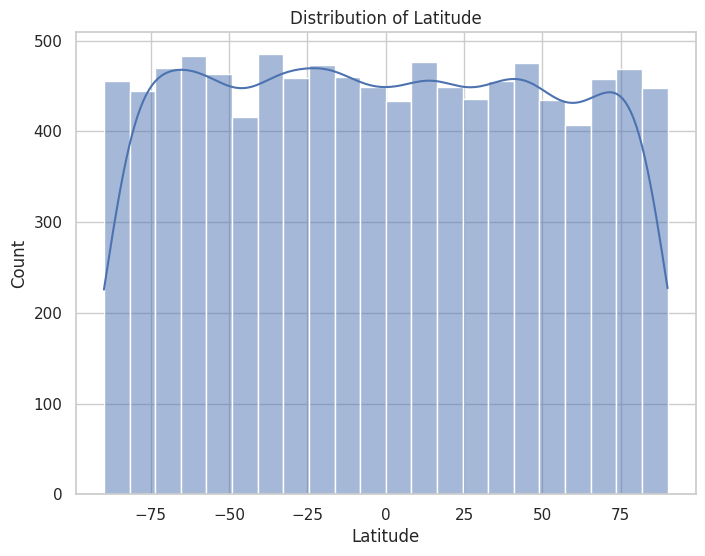

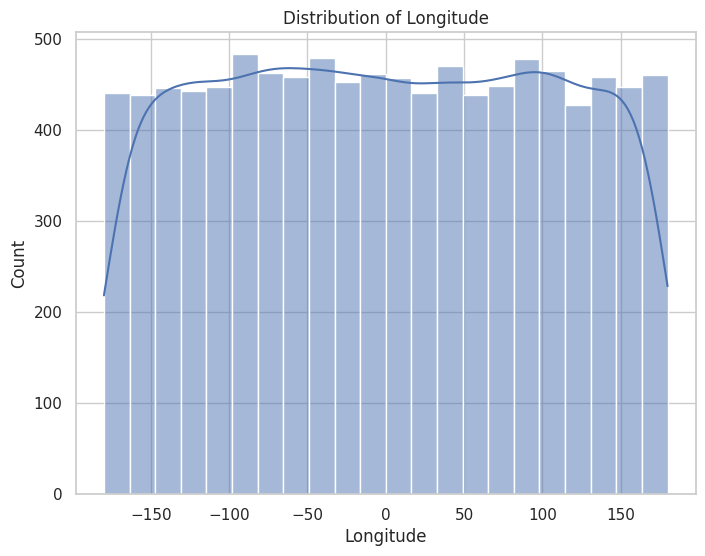

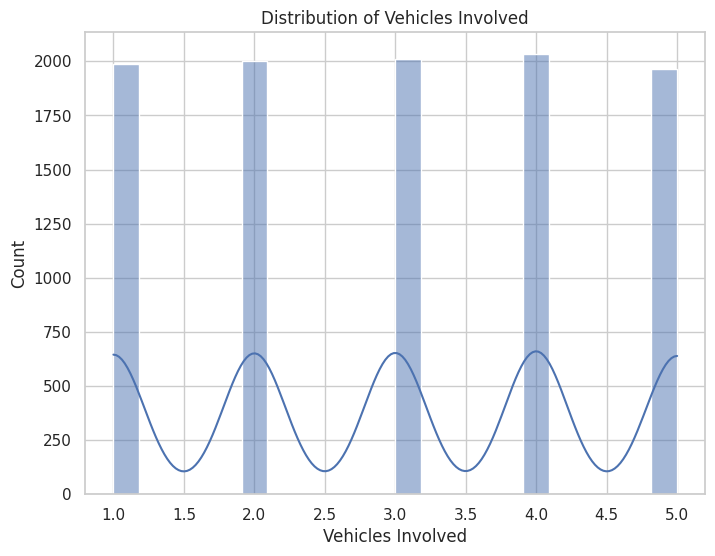

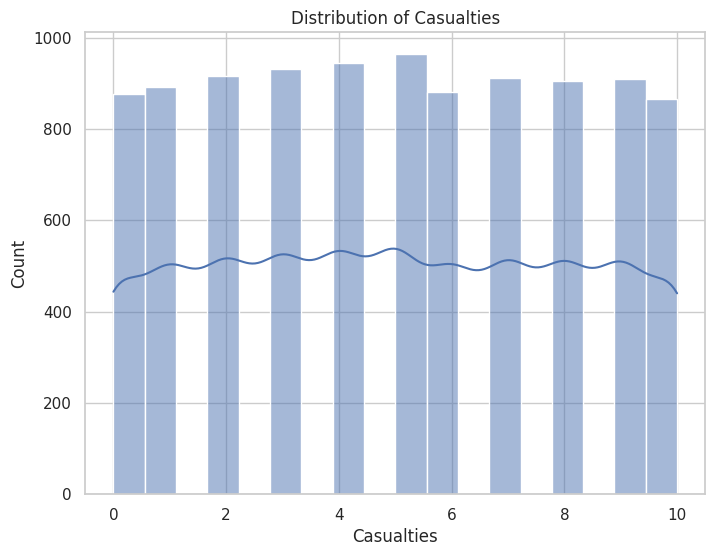

In [177]:
%matplotlib inline
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.show()


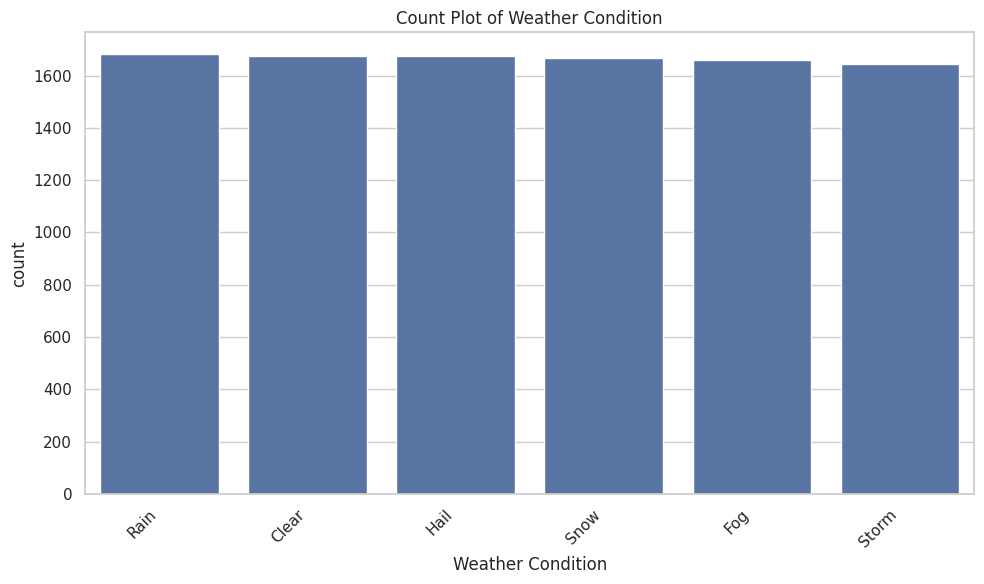

In [178]:
# Create a count plot (pie chart equivalent) for categorical variables such as Weather Condition
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Weather Condition', order=df['Weather Condition'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Count Plot of Weather Condition')
plt.tight_layout()
plt.show()

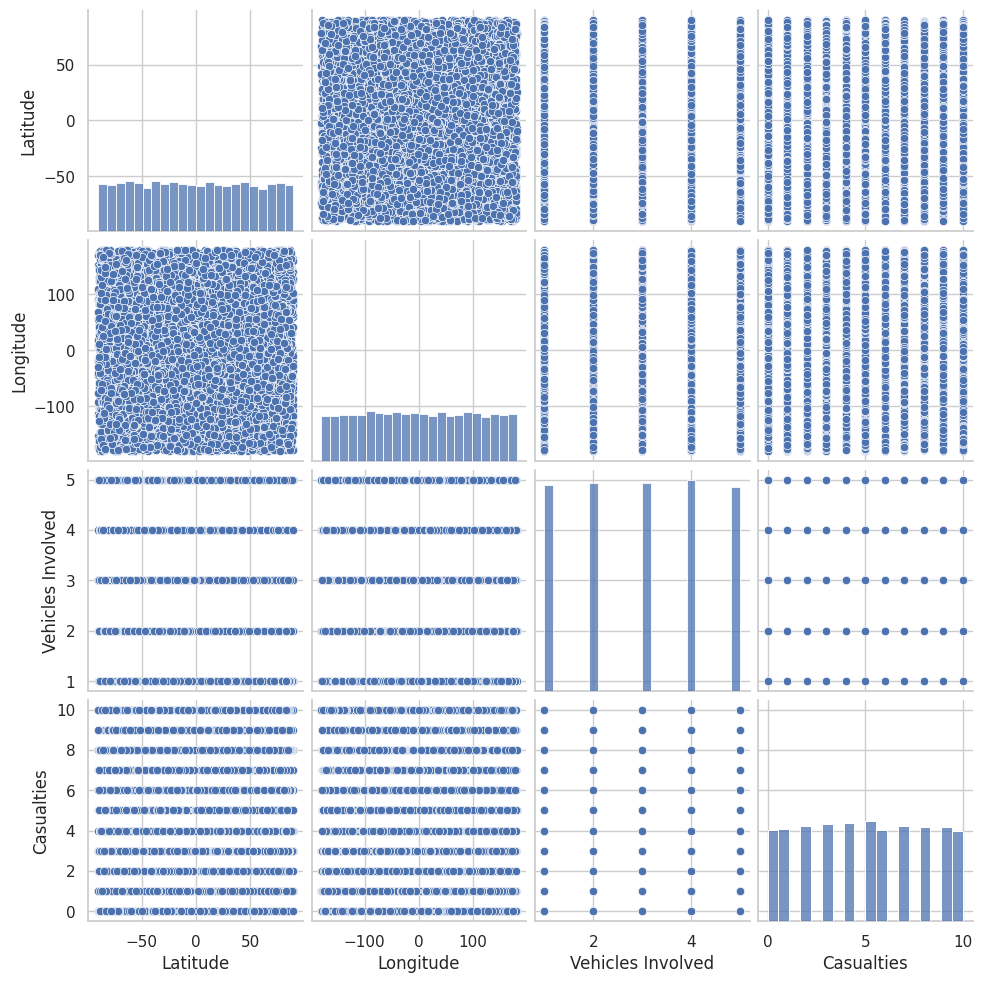

In [179]:
# Pair plot for numeric variables to inspect pairwise relationships
sns.pairplot(df[numeric_columns])
plt.show()

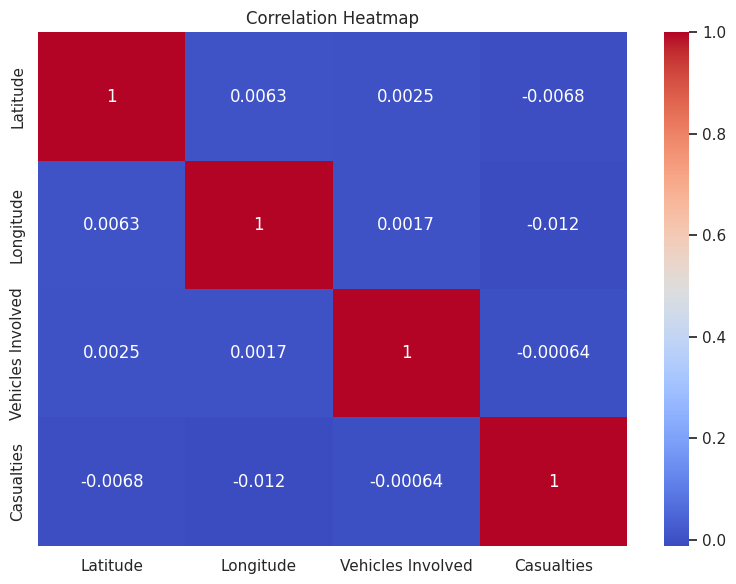

In [180]:
#If there are four or more numeric columns, display a correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >=4:
  plt.figure(figsize=(8, 6))
  sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
  plt.title('Correlation Heatmap')
  plt.tight_layout()
  plt.show()

#Modeling and Prediction
The dataset presents an opportunity to build a predictor. In this case, we attempt to forecast the number of casualties based on available features. The features used include both numerical variables (such as the number of vehicles involved) and categorical variables (such as weather and road condition). For categorical data, we perform basic encoding. A Random Forest Regressor is selected for its robustness. We then evaluate the predictions using the R² score.

In [181]:
#Import necessary modules for modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

#For modeling, we prepare the dataset by selecting features and target
# Our target is 'Casualties'

# For the features, we use 'Vehicles Involved', 'Weather Condition', 'Road Condition' and optionally others
features = ['Vehicles Involved', 'Weather Condition', 'Road Condition']
target = 'Casualties'

# Create a copy of the dataframe for modeling
df_model = df[features + ['Casualties']].copy()
df_model

,Vehicles Involved,Weather Condition,Road Condition,Casualties
0,5,Snow,Snowy,7
1,4,Clear,Icy,1
2,1,Rain,Snowy,7
3,4,Storm,Wet,0
4,3,Storm,Snowy,9
...,...,...,...,...
9995,3,Storm,Wet,10
9996,3,Storm,Dry,9
9997,2,Snow,Under Construction,3
9998,4,Storm,Under Construction,3


In [182]:
#Convert categorical features using one-hot encodeing
df_model = pd.get_dummies(df_model, columns=['Weather Condition', 'Road Condition'],drop_first=True)
df_model

,Vehicles Involved,Casualties,Weather Condition_Fog,Weather Condition_Hail,Weather Condition_Rain,Weather Condition_Snow,Weather Condition_Storm,Road Condition_Gravel,Road Condition_Icy,Road Condition_Snowy,Road Condition_Under Construction,Road Condition_Wet
0,5,7,False,False,False,True,False,False,False,True,False,False
1,4,1,False,False,False,False,False,False,True,False,False,False
2,1,7,False,False,True,False,False,False,False,True,False,False
3,4,0,False,False,False,False,True,False,False,False,False,True
4,3,9,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,10,False,False,False,False,True,False,False,False,False,True
9996,3,9,False,False,False,False,True,False,False,False,False,False
9997,2,3,False,False,False,True,False,False,False,False,True,False
9998,4,3,False,False,False,False,True,False,False,False,True,False


In [183]:
# Extract features from 'Time' and 'Date'
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour
df['Day_of_week'] = df['Date'].dt.dayofweek  # Monday=0 to Sunday=6
df['Month'] = df['Date'].dt.month

# Group rare 'Cause' categories
cause_counts = df['Cause'].value_counts()
df['Cause_Grouped'] = df['Cause'].apply(lambda x: x if cause_counts[x] > 50 else 'Other')

In [184]:
features = ['Vehicles Involved', 'Weather Condition', 'Road Condition', 'Cause_Grouped', 'Hour', 'Day_of_week', 'Month', 'Latitude', 'Longitude']
df_model = df[features + ['Casualties']].copy()
df_model = pd.get_dummies(df_model, columns=['Weather Condition', 'Road Condition', 'Cause_Grouped'], drop_first=True)

In [185]:
#Define X and y
X = df_model.drop('Casualties', axis = 1 )
y = df_model['Casualties']

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [166]:
#Train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, max_depth = 10, min_samples_split = 2, random_state=42)
model.fit(X_train, y_train)


#Make predictions on the test set
y_pred = model.predict(X_test)
print(y_pred)

[5.01842335 4.94241537 5.24802782 ... 4.94288013 5.13918285 5.16211636]


In [167]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 2.755060077863722
Mean Squared Error (MSE): 10.05022490923243
Root Mean Squared Error (RMSE): 3.1702089693319
R² Score: -0.0041231981869467305


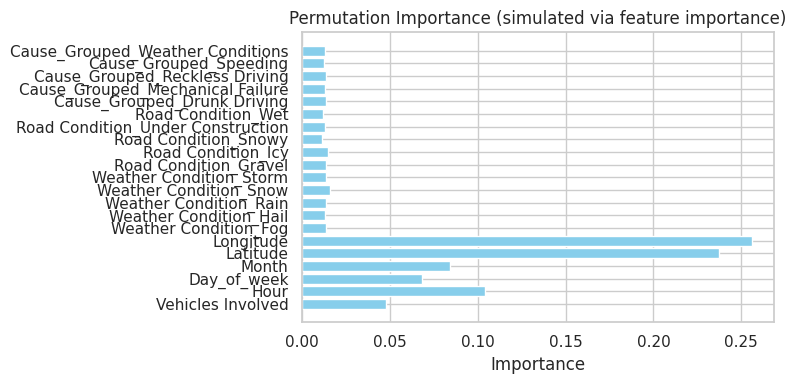

In [168]:
# If interested, further evaluations (e.g., mean squared error) and visualizations such as feature importance can be added

# Plotting the feature importances
importances = model.feature_importances_
features_list = X.columns

plt.figure(figsize=(8, 4))
plt.barh(features_list, importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Permutation Importance (simulated via feature importance)')
plt.tight_layout()
plt.show()